<a href="https://colab.research.google.com/github/Mohammad-Mahdi1999/BigCLAM-gephi-plugin/blob/master/Multiplication_via_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Generate

In [ ]:
x_1 = np.random.randint(0,10_000,1_000_000)
x_2 = np.random.randint(0,10_000,1_000_000)
y = x_1 * x_2 + 5

In [ ]:
df = pd.DataFrame({
    "x_1" : x_1,
    "x_2" : x_2,
    "y" : y,

})

df

,x_1,x_2,y
0,4700,1835,8624505
1,2539,1539,3907526
2,8095,4813,38961240
3,9572,1841,17622057
4,2240,6224,13941765
...,...,...,...
999995,4636,7518,34853453
999996,4251,4795,20383550
999997,6400,8530,54592005
999998,4918,2651,13037623


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Trasform new data in the [0-1] range
scaled_df = scaler.fit_transform(df.to_numpy())


In [ ]:
scaled_df = pd.DataFrame(scaled_df,columns=['x_1','x_2','y'])

scaled_df

,x_1,x_2,y
0,0.470047,0.183518,0.086271
1,0.253925,0.153915,0.039087
2,0.809581,0.481348,0.389729
3,0.957296,0.184118,0.176273
4,0.224022,0.622462,0.139459
...,...,...,...
999995,0.463646,0.751875,0.348639
999996,0.425143,0.479548,0.203897
999997,0.640064,0.853085,0.546084
999998,0.491849,0.265127,0.130415


In [ ]:
scaled_df.duplicated().sum()

5049

In [ ]:
scaled_df.drop_duplicates(inplace = True)

In [ ]:
len(scaled_df)

994951

In [ ]:
X_train = scaled_df[["x_1","x_2"]][:800000]
Y_train = scaled_df[["y"]][:800000]
X_test = scaled_df[["x_1","x_2"]][800000:]
Y_test = scaled_df[["y"]][800000:]

In [ ]:
X_train.shape, X_test.shape

((800000, 2), (194951, 2))

In [ ]:
from keras import layers
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
# model.add(layers.Dense(64,activation="relu"))
# model.add(layers.Dense(64,activation="relu"))
# model.add(layers.Dense(64,activation="relu"))
# model.add(layers.Dense(64,activation="relu"))
# model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="linear"))
# model.add(layers.Dense(1,activation="linear",input_dim=2))
model.summary()

model.compile(loss = 'MSE',
              optimizer="adam")

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=1024,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                192       
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 1)               

Epoch 1/100
625/625 [==============================] - 9s 10ms/step - loss: 0.0014 - val_loss: 1.1572e-06 - lr: 0.0010
Epoch 2/100
 13/625 [..............................] - ETA: 5s - loss: 4.6001e-06

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 7s 12ms/step - loss: 1.0185e-05 - val_loss: 7.5732e-07 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 6s 9ms/step - loss: 7.8118e-06 - val_loss: 8.0311e-07 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 8.4180e-06 - val_loss: 2.8752e-06 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 6s 10ms/step - loss: 8.5167e-06 - val_loss: 6.7539e-07 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 6s 9ms/step - loss: 6.3929e-06 - val_loss: 1.1946e-05 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - 7s 12ms/step - loss: 7.1973e-06 - val_loss: 5.0994e-07 - lr: 0.0010
Epoch 8/100
620/625 [============================>.] - ETA: 0s - loss: 5.8226e-06
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
625/625 [==============================] - 6s 9ms/step - loss: 5.7832e-06 - val_loss: 1.6241e-06 - lr: 0.0010
Epoch 9

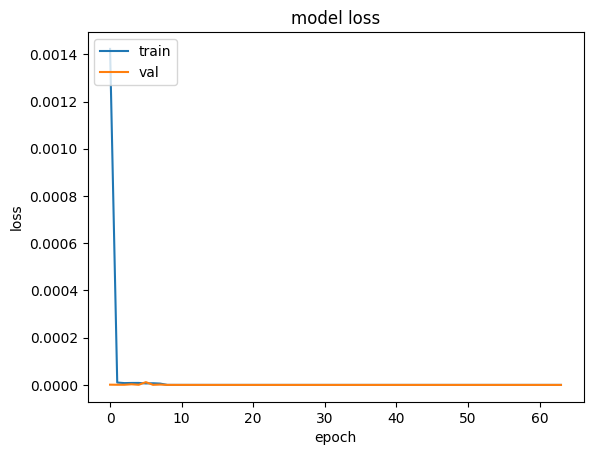

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

6093/6093 [==============================] - 13s 2ms/step - loss: 1.2708e-07


1.2707938878975256e-07

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :",num_1*num_2 +5 )
# display(unseen_data)
predicted = model.predict(unseen_data[:,:2])
print(predicted)
output = scaler.inverse_transform([[predicted[:,0][0],np.nan,np.nan]])
output

Data : [[0.80008001 0.30003           nan]]
Label : 24000005
1/1 [==============================] - 0s 109ms/step
[[0.24006832]]


array([[2400.44309628,           nan,           nan]])

In [ ]:
unseen_data = X_test.iloc[:1]
print("Data :")
display(unseen_data)
print("lable :",)
display(Y_test.iloc[:1])
predicted = model.predict(unseen_data)
print(predicted)
output = scaler.inverse_transform([[predicted[:,0][0],np.nan,np.nan]])
output

Data :


,x_1,x_2
803299,0.670967,0.126313


lable :


,y
803299,0.08476


1/1 [==============================] - 0s 97ms/step
[[0.08487717]]


array([[848.68682905,          nan,          nan]])

In [ ]:
predict = model.predict([[200,300]])
predict

1/1 [==============================] - 0s 118ms/step


array([[317.73767]], dtype=float32)